In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('book.csv', encoding='latin-1')

In [5]:
df.tail()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8
9999,10000,162129,Kids Say the Darndest Things,6


In [6]:
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head(2)

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [8]:
df.head(2)

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3


In [9]:
## Let's create rating dataframe with the average rating and number of rating
df.groupby('Book.Title')['Book.Rating'].mean().sort_values(ascending=False).head()

Book.Title
Clear Light of Day                                         10.0
Substitute Teaching: A Handbook for Hassle-Free Subbing    10.0
Daughter of Camelot (Merlin's Legacy, No 6)                10.0
The Resourceful English Teacher                            10.0
Das verbotene Lied.                                        10.0
Name: Book.Rating, dtype: float64

In [10]:
df.groupby('Book.Title')['Book.Rating'].count().sort_values(ascending=False).head()

Book.Title
Fahrenheit 451                                     5
Vanished                                           4
Charlie and the Chocolate Factory                  4
Stardust                                           4
The Amber Spyglass (His Dark Materials, Book 3)    4
Name: Book.Rating, dtype: int64

In [11]:
rating = pd.DataFrame(df.groupby('Book.Title')['Book.Rating'].mean())
rating.head()

,Book.Rating
Book.Title,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0
'48,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0


In [12]:
rating['num_of_rating'] = pd.DataFrame(df.groupby('Book.Title')['Book.Rating'].count())
rating.head()

,Book.Rating,num_of_rating
Book.Title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1


In [13]:
rating.num_of_rating.value_counts()

1    9354
2     277
3      21
4       6
5       1
Name: num_of_rating, dtype: int64

<AxesSubplot:>

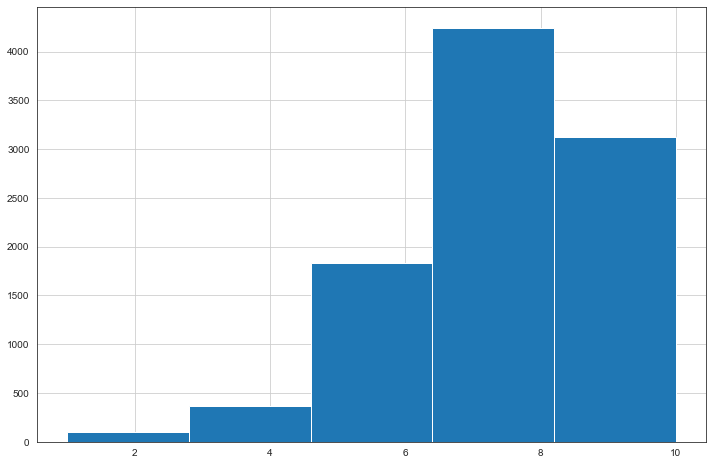

In [14]:
plt.figure(figsize=(12,8))
rating['Book.Rating'].hist(bins=5)

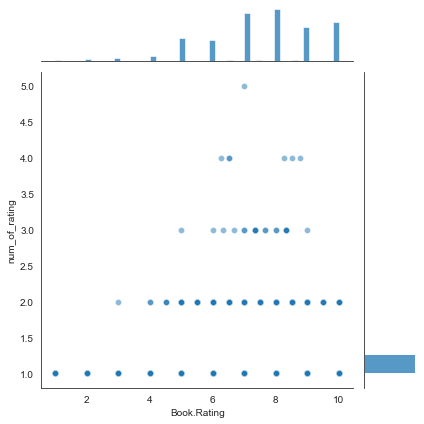

In [15]:
sns.jointplot(x='Book.Rating', y='num_of_rating', data=rating, alpha=0.5)

In [5]:
df.drop_duplicates(subset='User.ID', keep = False, inplace = True)

In [6]:
df['User.ID'].shape

(1323,)

In [7]:
df.shape

(1323, 3)

In [8]:
book2 = df.pivot(index='User.ID', columns='Book.Title', values='Book.Rating')

In [9]:
book2

Book.Title,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,11th Hour,"20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2061: Odyssey Three,4 Blondes,"40 Tons Of Trouble (Women Who Dare) (Harlequin Super Romance, No 726)",500 palabras nuevas para ti / 500 Words To Grow On,8 Steps to a Healthy Heart: The Complete Guide to Heart Disease Prevention and Recovery from Heart Attack and Bypass Surgery,...,YESTERDAY'S NEWS : YESTERDAY'S NEWS,Year's Best Fantasy and Horror: Sixteenth Edition,You Are Not a Stranger Here : Stories,You're the One,Yukon Ho!,Yuwipi: Vision and Experience in Oglala Ritual,Zen in the Art of Archery (Vintage Spiritual Classics),Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)
User.ID,,,,,,,,,,,,,,,,,,,,,
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
book2.fillna(0, inplace=True)

In [11]:
book2.head()

Book.Title,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,11th Hour,"20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2061: Odyssey Three,4 Blondes,"40 Tons Of Trouble (Women Who Dare) (Harlequin Super Romance, No 726)",500 palabras nuevas para ti / 500 Words To Grow On,8 Steps to a Healthy Heart: The Complete Guide to Heart Disease Prevention and Recovery from Heart Attack and Bypass Surgery,...,YESTERDAY'S NEWS : YESTERDAY'S NEWS,Year's Best Fantasy and Horror: Sixteenth Edition,You Are Not a Stranger Here : Stories,You're the One,Yukon Ho!,Yuwipi: Vision and Experience in Oglala Ritual,Zen in the Art of Archery (Vintage Spiritual Classics),Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)
User.ID,,,,,,,,,,,,,,,,,,,,,
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
book2.corr()

Book.Title,101 Bright Ideas: Esl Activities for All Ages,101 Dalmatians,11th Hour,"20,001 Names for Baby",2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,2061: Odyssey Three,4 Blondes,"40 Tons Of Trouble (Women Who Dare) (Harlequin Super Romance, No 726)",500 palabras nuevas para ti / 500 Words To Grow On,8 Steps to a Healthy Heart: The Complete Guide to Heart Disease Prevention and Recovery from Heart Attack and Bypass Surgery,...,YESTERDAY'S NEWS : YESTERDAY'S NEWS,Year's Best Fantasy and Horror: Sixteenth Edition,You Are Not a Stranger Here : Stories,You're the One,Yukon Ho!,Yuwipi: Vision and Experience in Oglala Ritual,Zen in the Art of Archery (Vintage Spiritual Classics),Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book)
Book.Title,,,,,,,,,,,,,,,,,,,,,
101 Bright Ideas: Esl Activities for All Ages,1.000000,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,...,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756
101 Dalmatians,-0.000756,1.000000,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,...,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756
11th Hour,-0.000756,-0.000756,1.000000,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,...,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756
"20,001 Names for Baby",-0.000756,-0.000756,-0.000756,1.000000,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,...,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756
2001 Spanish and English Idioms/2001 Modismos Espanoles E Ingleses: 2001 Modismos Espanoles E Ingleses,-0.000756,-0.000756,-0.000756,-0.000756,1.000000,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,...,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yuwipi: Vision and Experience in Oglala Ritual,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,...,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,1.000000,-0.000756,-0.000756,-0.000756,-0.000756
Zen in the Art of Archery (Vintage Spiritual Classics),-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,...,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,1.000000,-0.000756,-0.000756,-0.000756
Zodiac: The Eco-Thriller,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,...,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,-0.000756,1.000000,-0.000756,-0.000756


In [13]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [14]:
user_similarities = 1- pairwise_distances(book2.values, metric='cosine')

In [15]:
user_similarities

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [16]:
book2 = pd.DataFrame(user_similarities)

In [17]:
book2

,0,1,2,3,4,5,6,7,8,9,...,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
book2.index = df['User.ID'].unique()
book2.columns = df['User.ID'].unique()

In [19]:
book2.iloc[0:5, 0:5]

,276726,276736,276737,276744,276745
276726,1.0,0.0,0.0,0.0,0.0
276736,0.0,1.0,0.0,0.0,0.0
276737,0.0,0.0,1.0,0.0,0.0
276744,0.0,0.0,0.0,1.0,0.0
276745,0.0,0.0,0.0,0.0,1.0


In [20]:
np.fill_diagonal(user_similarities, 0)
book2.iloc[0:5, 0:5]

,276726,276736,276737,276744,276745
276726,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0
276745,0.0,0.0,0.0,0.0,0.0


In [28]:
book2.idxmax(axis=1).iloc[0:5]

276726    276726
276736    276726
276737    276726
276744    276726
276745    276726
dtype: int64

In [29]:
df[(df['User.ID']==276736) | (df['User.ID']==276726)]

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
3,276736,Flu: The Story of the Great Influenza Pandemic...,8


In [30]:
df[(df['User.ID']==276745) | (df['User.ID']==276726)]

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
6,276745,What If?: The World's Foremost Military Histor...,10
